<a href="https://colab.research.google.com/github/Pranabm1987/Avighna/blob/master/Energy_consumption%20using%20Exponential_smoothing_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exponential Smoothing

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

from sklearn.metrics import mean_squared_error
from math import sqrt
from statistics import mean 

import warnings
warnings.filterwarnings("ignore")

In [4]:
#LOADING THE DATA

data = pd.read_csv("/content/energy consumption.csv")

In [77]:
data.shape

(969, 2)

In [76]:
data.head()

,DATE,ENERGY_INDEX
DATE,,
1939-01-01,01/1939,3.3842
1939-02-01,02/1939,3.4100
1939-03-01,03/1939,3.4875
1939-04-01,04/1939,3.5133
1939-05-01,05/1939,3.5133


In [9]:
data.tail()

,DATE,ENERGY_INDEX
964,05/2019,91.9046
965,06/2019,98.4397
966,07/2019,112.9469
967,08/2019,111.6645
968,09/2019,102.2911


# Required Preprocessing 

In [21]:
data.timestamp = pd.to_datetime(data['DATE'],format='%m/%Y')
data.index = data.timestamp

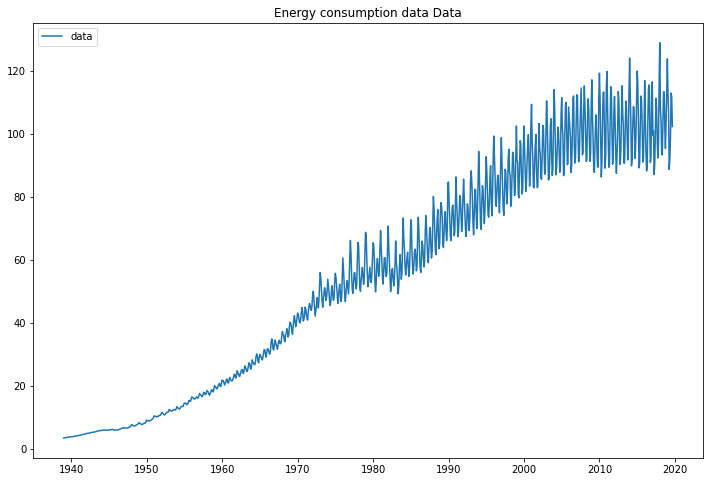

In [22]:
plt.figure(figsize=(12,8))

plt.plot(data.index, data['ENERGY_INDEX'], label='data')

plt.legend(loc='best')
plt.title("Energy consumption data Data")
plt.show()

In [38]:
data.DATE.min() , data.DATE.max()

('01/1939', '12/2018')

In [35]:
# Splitting the data into training and validation set
data_train= data[:700]
data_valid = data[700:]

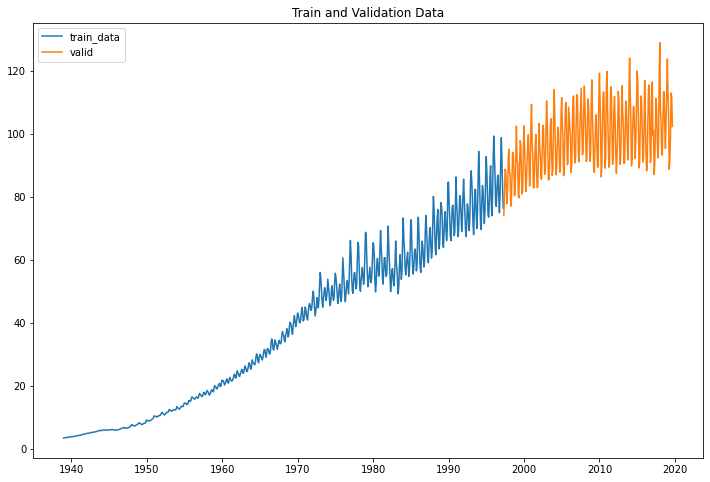

In [40]:
plt.figure(figsize=(12,8))

plt.plot(data_train.index, data_train['ENERGY_INDEX'], label='train_data')
plt.plot(data_valid.index,data_valid['ENERGY_INDEX'], label='valid')
plt.legend(loc='best')
plt.title("Train and Validation Data")
plt.show()

# Exponential Smoothing

In [24]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing

<img src = "alpha values.png">

In [41]:
model = ExponentialSmoothing(np.asarray(data_train['ENERGY_INDEX']))
model = model.fit(smoothing_level=0.7,initial_level=3,optimized=False) 
data_valid['Holt_linear'] = model.forecast(len(data_valid))

In [ ]:
model.params

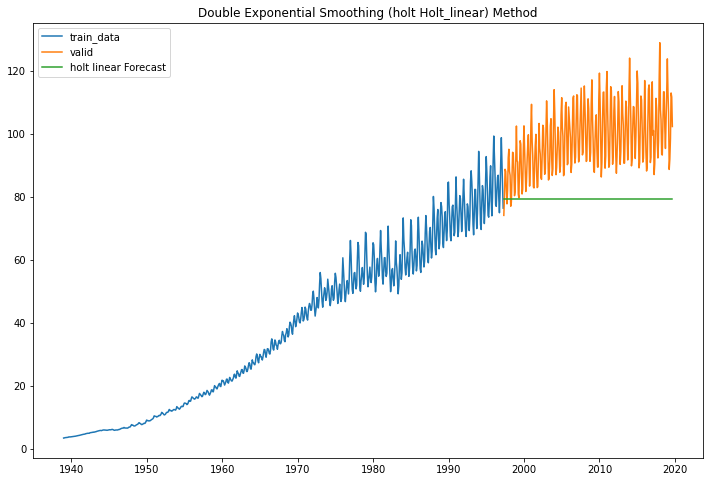

In [43]:
plt.figure(figsize=(12,8))

plt.plot(data_train.index, data_train['ENERGY_INDEX'], label='train_data')
plt.plot(data_valid.index,data_valid['ENERGY_INDEX'], label='valid')
plt.plot(data_valid.index,data_valid['Holt_linear'], label='holt linear Forecast')
plt.legend(loc='best')
plt.title("Double Exponential Smoothing (holt Holt_linear) Method")
plt.show()

In [44]:
# calculating RMSE 
rmse = sqrt(mean_squared_error(data_valid['ENERGY_INDEX'], data_valid['Holt_linear']))
print('The RMSE value for Holt Linear Method is', rmse)


The RMSE value for Holt Linear Method is 21.880616582847907


Now lets see if RMSE improves if we apply double exponential smoothing

# Double Exponential Smoothing

In [46]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [47]:
model = ExponentialSmoothing(np.asarray(data_train['ENERGY_INDEX']), trend='add')
model = model.fit(smoothing_level=0.7, smoothing_slope=0.0001, initial_slope = 1.2) #  

data_valid['Holt_linear'] = model.forecast(len(data_valid))

In [48]:
model.params

{'damping_slope': nan,
 'initial_level': 1.8178544352919,
 'initial_seasons': array([], dtype=float64),
 'initial_slope': 1.2,
 'lamda': None,
 'remove_bias': False,
 'smoothing_level': 0.7,
 'smoothing_seasonal': nan,
 'smoothing_slope': 0.0001,
 'use_boxcox': False}

In [ ]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data['count'], label='train_data')
plt.plot(valid_data.index,valid_data['count'], label='valid')
plt.plot(valid_data.index,valid_data['Holt_linear'], label='holt linear Forecast')
plt.legend(loc='best')
plt.title("Double Exponential Smoothing (holt Holt_linear) Method")
plt.show()

In [ ]:
# calculating RMSE 
rmse = sqrt(mean_squared_error(valid_data['count'], valid_data['Holt_linear']))
print('The RMSE value for Holt Linear Method is', rmse)

# Holt's Winters ( triple exponential smoothing)

In [50]:
from statsmodels.tsa.api import ExponentialSmoothing

In [71]:
model = ExponentialSmoothing(np.asarray(data_train['ENERGY_INDEX']) ,seasonal_periods=7 ,trend='add', seasonal='mul',)
fit1 = model.fit(smoothing_level=0.5, smoothing_slope=0.0001, smoothing_seasonal=0.1) #

data_valid['Holt_Winter'] = fit1.forecast(len(data_valid)) 

In [ ]:
model.params

{'smoothing_level': 0.4,
 'smoothing_slope': 0.1,
 'smoothing_seasonal': 0.8,
 'damping_slope': nan,
 'initial_level': 51.48192771084337,
 'initial_slope': 0.12244897959183675,
 'initial_seasons': array([0.05827288, 0.05827288, 0.03884858, 0.03884858, 0.03884858,
        0.05827288, 0.05827288]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

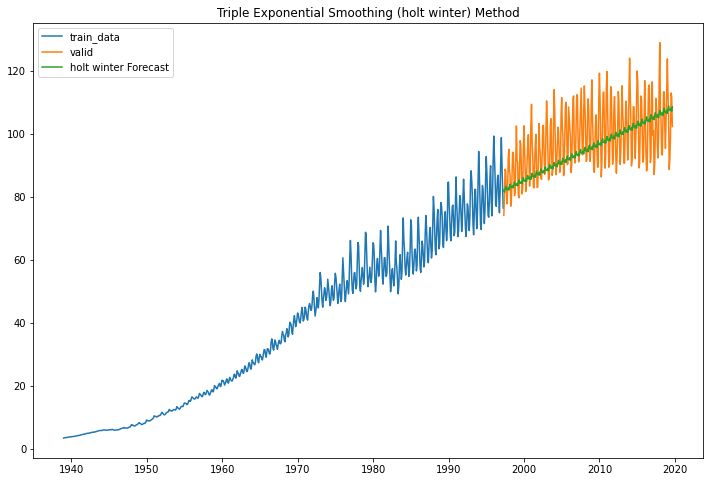

In [72]:
plt.figure(figsize=(12,8))

plt.plot(data_train.index, data_train['ENERGY_INDEX'], label='train_data')
plt.plot(data_valid.index,data_valid['ENERGY_INDEX'], label='valid')
plt.plot(data_valid.index,data_valid['Holt_Winter'], label='holt winter Forecast')
plt.legend(loc='best')
plt.title("Triple Exponential Smoothing (holt winter) Method")
plt.show()

In [74]:
# calculating RMSE 
rmse = sqrt(mean_squared_error(data_valid['ENERGY_INDEX'], data_valid['Holt_Winter']))
print('The RMSE value for Holt Winter Method is', rmse)

The RMSE value for Holt Winter Method is 10.008298029931707
